In [24]:
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import re
import string
import keras.backend as K
from nltk.tokenize import word_tokenize
from sklearn import feature_extraction
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import tensorflow.keras.regularizers as regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
nltk.download('stopwords')
nltk.download('punkt')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
data=pd.read_csv('/content/sample_data/TrainBSNLP.csv')

In [26]:
data.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      616 non-null    object
 1   text    616 non-null    object
 2   label   616 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


In [28]:
data.head(10)

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
5,V6VSDJ5I,What are the effects of depression to ones health,Depression
6,9736J4UE,Why is everything so hard to deal with in this...,Depression
7,AY8L479Y,I feel emotionally overwhelmed,Depression
8,OSFJV5EC,How to manage taking alcohol?,Alcohol
9,U4SGUGGM,Is heaven open for us who smoke bhang?,Drugs


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      616 non-null    object
 1   text    616 non-null    object
 2   label   616 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


In [30]:
# data.dropna()

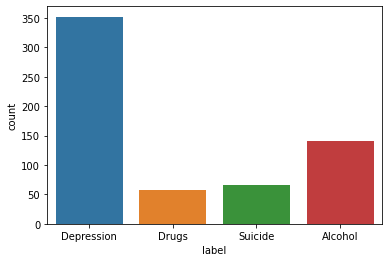

In [31]:
# DATA VISUALIZATION
import seaborn as sb
import matplotlib.pyplot as plt
sb.countplot(data['label'])
plt.show()

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [33]:
#  data['reviews.text']= data['reviews.text'].apply(str)

In [34]:
# PEROFRMING DATA CLEANING, word segmentation AND STREMMING
corpus = []
for i in range(0, len(data['text'])):
    new_text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    new_text = new_text.lower()
    new_text = new_text.split()
    ps = PorterStemmer()
    new_text = [ps.stem(word) for word in new_text if not word in set(stopwords.words('english'))]
    new_text = ' '.join(new_text)
    corpus.append(new_text)

In [35]:
# corpus
# MAX_LEN=20
# tokenizer_obj=Tokenizer()
# tokenizer_obj.fit_on_texts(tokenized)
# sequences=tokenizer_obj.texts_to_sequences(tokenized)

# tweet_pad=pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')
# word_index=tokenizer_obj.word_index
# print('Number of unique words:',len(word_index))


In [36]:
#tokenization
from keras.preprocessing import sequence
max_words = 500
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(corpus)
sequences = tok.texts_to_sequences(corpus)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [37]:
sequences_matrix

array([[  0,   0,   0, ...,  22, 246,  82],
       [  0,   0,   0, ...,   0,   8, 166],
       [  0,   0,   0, ...,  36, 125,  67],
       ...,
       [  0,   0,   0, ...,   0,  80,   4],
       [  0,   0,   0, ...,   0,   1, 100],
       [  0,   0,   0, ...,   1,  92,   5]], dtype=int32)

In [38]:
max_words

500

In [39]:
# embed_dim = 128
# lstm_out = 196
embedding_mat_col=100
model = Sequential()
model.add(Embedding(max_words,embedding_mat_col,input_length = max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(100, dropout=0.4, recurrent_dropout=0.4))

model.add(Dense(4,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          50000     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 130,804
Trainable params: 130,804
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
dummies = pd.get_dummies(data['label'])
dummies.head()


,Alcohol,Depression,Drugs,Suicide
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [41]:
y=data['label']

In [42]:
X=sequences_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X,dummies, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(492, 200) (492, 4)
(124, 200) (124, 4)


In [43]:
batch_size =16
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size,validation_data=(X_test,Y_test),verbose = 2)

Epoch 1/10
31/31 - 11s - loss: 1.1868 - accuracy: 0.5407 - val_loss: 1.2494 - val_accuracy: 0.5081
Epoch 2/10
31/31 - 10s - loss: 1.0486 - accuracy: 0.5915 - val_loss: 1.1230 - val_accuracy: 0.5081
Epoch 3/10
31/31 - 10s - loss: 0.8760 - accuracy: 0.6687 - val_loss: 0.8890 - val_accuracy: 0.6774
Epoch 4/10
31/31 - 10s - loss: 0.6335 - accuracy: 0.7724 - val_loss: 0.6874 - val_accuracy: 0.7177
Epoch 5/10
31/31 - 10s - loss: 0.4797 - accuracy: 0.7886 - val_loss: 0.6282 - val_accuracy: 0.7016
Epoch 6/10
31/31 - 10s - loss: 0.3891 - accuracy: 0.8476 - val_loss: 0.5558 - val_accuracy: 0.7903
Epoch 7/10
31/31 - 10s - loss: 0.3464 - accuracy: 0.8780 - val_loss: 0.5426 - val_accuracy: 0.8065
Epoch 8/10
31/31 - 10s - loss: 0.2837 - accuracy: 0.9207 - val_loss: 0.4979 - val_accuracy: 0.8629
Epoch 9/10
31/31 - 10s - loss: 0.2470 - accuracy: 0.9289 - val_loss: 0.4629 - val_accuracy: 0.8710
Epoch 10/10
31/31 - 10s - loss: 0.1955 - accuracy: 0.9431 - val_loss: 0.4668 - val_accuracy: 0.8629


In [44]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4/4 [==============================] - 0s 42ms/step - loss: 0.4668 - accuracy: 0.8629
Test set
  Loss: 0.467
  Accuracy: 0.863


In [45]:
alcohol_msg=["Drunkenness is nothing but voluntary madness.","Drink because you are happy, but never because you are miserable.",
            "Talking to a drunk person was like talking to an extremely happy, severely brain-damaged three-year-old STOP IT TODAY!",
            "First you take a drink, then the drink takes a drink, then the drink takes you.","As an alcoholic, you will violate your standards quicker than you can lower them."]

depression_msg=["There is hope, even when your brain tells you there isn’t","Sometimes, life will kick you around, but sooner or later, you realize you’re not just a survivor. You’re a warrior, and you’re stronger than anything life throws your way.",
               "On particularly rough days when I’m sure I can’t possibly endure, I like to remind myself that my track record for getting through bad days so far is 100%, and that’s pretty good, YOU CAN DO THIS TOO !",
               "Sometimes you climb out of bed in the morning and you think, I’m not going to make it, but you laugh inside – remembering all the times you’ve felt that way.","Give yourself another day, another chance. You will find your courage eventually. Don’t give up on yourself just yet",
               ]
Drugs_msg=["When everything seems like an uphill struggle, just think of the view from the top.","If you can quit for a day, you can quit for a lifetime.",
          "Recovery is hard. Regret is harder.","You can’t defeat the darkness by keeping it caged inside of you","When you use drugs for a long time, it can cause changes in other brain chemical systems and circuits as well, STOP IT NOW !"]

suicidal_msg=["Soak up the views. Take in the bad weather and the good weather. You are not the storm.","Suicide doesn’t end the chances of life getting worse, it eliminates the possibility of it ever getting any better",
             "Never, never, never give up!","If you’re looking for a sign not to kill yourself, this is it.","The person who completes suicide, dies once. Those left behind die a thousand deaths, trying to relive those terrible moments and understand… why?",
             "Place your hand over your heart, can you feel it? That is called purpose. You’re alive for a reason so don’t ever give up."]

In [47]:
import random
test_data=pd.read_csv('/content/sample_data/TestBSNLP.csv')
test_data=test_data.drop(columns='ID',axis=1)

text = random.choice(test_data['text'])
print(text)
#vectorizing the tweet by the pre-fitted tokenizer instance
text = tok.texts_to_sequences(text)
#padding the tweet to have exactly the same shape as `embedding_2` input
text = pad_sequences(text, maxlen=200, dtype='int32', value=0)
sentiment = model.predict(text,batch_size=1,verbose = 2)[0]
print(sentiment)

I feel low,what should I do?
28/28 - 1s
[0.12663223 0.47377843 0.09221898 0.3073704 ]


In [48]:
list=[]
for i in sentiment:
    list.append(i)
m=max(list)
index=list.index(m)
if index==0:
    print('Alcohol')
    print(random.choice(alcohol_msg))
elif index==1:
    print('Depression')
    print(random.choice(depression_msg))
elif index==2:
    print('Drugs')
    print(random.choice(Drugs_msg))
elif index==3:
    print('Suicide')   
    print(random.choice(suicidal_msg))



Depression
On particularly rough days when I’m sure I can’t possibly endure, I like to remind myself that my track record for getting through bad days so far is 100%, and that’s pretty good, YOU CAN DO THIS TOO !
